<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Dependencies" data-toc-modified-id="Importing-Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Dependencies</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Loading-the-heart-disease-csv-data-into-a-pandas-dataframe" data-toc-modified-id="Loading-the-heart-disease-csv-data-into-a-pandas-dataframe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading the heart disease csv data into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#Data-Cleansing:-seggregated-the-target-outcomes" data-toc-modified-id="Data-Cleansing:-seggregated-the-target-outcomes-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data Cleansing: seggregated the target outcomes</a></span></li></ul></li><li><span><a href="#Slicing-the-DataFrame-by-cholestrol-levels" data-toc-modified-id="Slicing-the-DataFrame-by-cholestrol-levels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Slicing the DataFrame by cholestrol levels</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Cholestrol-Indicator-by-Gender" data-toc-modified-id="Cholestrol-Indicator-by-Gender-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cholestrol Indicator by Gender</a></span></li><li><span><a href="#Heart-Rate-Indicator" data-toc-modified-id="Heart-Rate-Indicator-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Heart Rate Indicator</a></span><ul class="toc-item"><li><span><a href="#Loading-data-into-a-new-Data-Frame" data-toc-modified-id="Loading-data-into-a-new-Data-Frame-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Loading data into a new Data Frame</a></span></li><li><span><a href="#Data-Classification" data-toc-modified-id="Data-Classification-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Data Classification</a></span></li><li><span><a href="#Plotting-the-pie-chart-using-Matplotlib" data-toc-modified-id="Plotting-the-pie-chart-using-Matplotlib-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Plotting the pie chart using Matplotlib</a></span></li></ul></li></ul></li></ul></div>

### Importing Dependencies


In [19]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


### Data Preparation

#### Loading the heart disease csv data into a pandas dataframe

In [20]:
df= pd.read_csv('static/data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Data Cleansing: seggregated the target outcomes

In [21]:
df["target"]= df["target"].replace(0, "Healthy") 
df["target"]= df["target"].replace(1, "Diagnosed with Heart Disease") 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Healthy
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Healthy
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Healthy
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Healthy
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Healthy


#### Slicing the DataFrame by cholestrol levels

In [22]:
bins = [0, 125, 250, 350, 550]
groups=["No cholesteral", "Low cholesteral", "Medium cholesteral", "High cholesteral"]
df["Cholesteral_Levels"] = pd.cut(df["chol"], bins, labels=groups, include_lowest=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cholesteral_Levels
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Healthy,Low cholesteral
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Healthy,Low cholesteral
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Healthy,Low cholesteral
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Healthy,Low cholesteral
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Healthy,Medium cholesteral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,Diagnosed with Heart Disease,Low cholesteral
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,Healthy,Medium cholesteral
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,Healthy,Medium cholesteral
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,Diagnosed with Heart Disease,Medium cholesteral


In [23]:
max_heartrate=df['thalach'].max()
min_heartrate=df['thalach'].min()
median_heartrate=df['thalach'].median()
print(max_heartrate)
print(min_heartrate)
print(median_heartrate)

202
71
152.0


In [24]:
bins = [0, 71, 152, 202]
groups=["Normal","Abnormal Progression", "Prone to Disease"]
df["Heart_Rate"] = pd.cut(df["thalach"], bins, labels=groups, include_lowest=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cholesteral_Levels,Heart_Rate
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Healthy,Low cholesteral,Prone to Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Healthy,Low cholesteral,Prone to Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Healthy,Low cholesteral,Abnormal Progression
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Healthy,Low cholesteral,Prone to Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Healthy,Medium cholesteral,Abnormal Progression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,Diagnosed with Heart Disease,Low cholesteral,Prone to Disease
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,Healthy,Medium cholesteral,Abnormal Progression
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,Healthy,Medium cholesteral,Abnormal Progression
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,Diagnosed with Heart Disease,Medium cholesteral,Prone to Disease


### Analysis

#### Cholestrol Indicator by Gender

In [25]:
fig3 = go.Figure(
    data=[
        go.Bar(
            name="Male",
            x=df['Cholesteral_Levels'],
            y=df['chol'],
            offsetgroup=0,
            
        ),
        go.Bar(
            name="Female",
            x=df['Cholesteral_Levels'],
            y=df['chol'],
            offsetgroup=1,
            
        ),
    ],
    layout=go.Layout(
        title="Cholesteral Levels by Gender",
        yaxis_title="Cholesteral Levels"
     )
)
fig3.show()
fig3.write_html("static/images/cholestrolindicator.html")


#### Heart Rate Indicator

##### Loading data into a new Data Frame

In [26]:
heartrate_df=df.groupby('Heart_Rate').count()
heartrate_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cholesteral_Levels
Heart_Rate,,,,,,,,,,,,,,,
Normal,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Abnormal Progression,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
Prone to Disease,502,502,502,502,502,502,502,502,502,502,502,502,502,502,499


##### Data Classification

In [27]:
heart_rate = ["Normal","Abnormal Progression", "Prone to Disease"]
count = [4, 519, 502]
colors = ["yellowgreen", "lightskyblue", "red"]
explode = (0.6,0.1,0.06)

##### Plotting the pie chart using Matplotlib

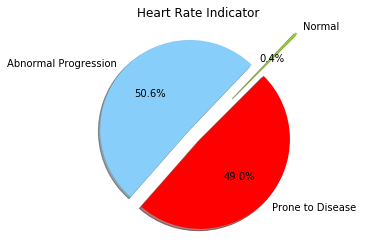

In [28]:
plt.title("Heart Rate Indicator")
plt.pie(count, explode=explode, labels=heart_rate, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
fig1 = plt.gcf()
plt.show()


In [29]:
plt.draw()
fig1.savefig("static/images/heartrate.png", dpi=100)


<Figure size 432x288 with 0 Axes>